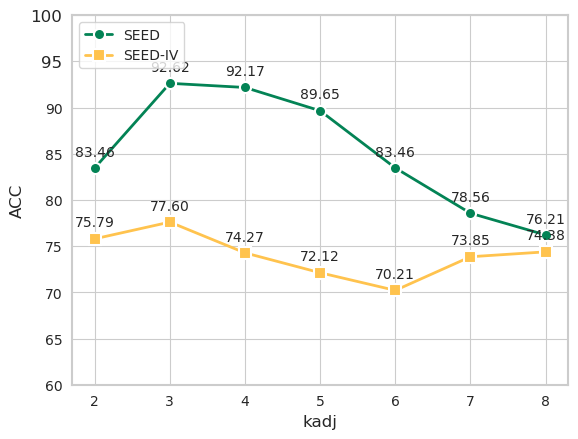

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x = [2, 3, 4, 5, 6, 7, 8]
y1 = [83.46,92.62,92.17,89.65,83.46,78.56,76.21]
y2 = [75.79,77.60,74.27,72.12,70.21,73.85,74.38]
color1 = "#038355"  # 孔雀绿
color2 = "#ffc34e"  # 向日黄

# 设置字体
font = {'family': 'Times New Roman', 'size': 12}
plt.rc('font', **font)

# 绘图
sns.set_style("whitegrid")
sns.lineplot(x=np.arange(len(x)), y=y1, color=color1, linewidth=2.0, marker="o", markersize=8,
             markeredgecolor="white", markeredgewidth=1.5, label='SEED')
sns.lineplot(x=np.arange(len(x)), y=y2, color=color2, linewidth=2.0, marker="s", markersize=8,
             markeredgecolor="white", markeredgewidth=1.5, label='SEED-IV')

# 添加标题和标签
plt.xlabel("kadj", fontsize=12)
plt.ylabel("ACC", fontsize=12)

# 添加图例
plt.legend(loc='upper left', frameon=True, fontsize=10)

# 设置刻度字体和范围
plt.xticks(np.arange(len(x)), labels=x, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(60, 100)

# 在每个点上添加坐标值
for i in range(len(x)):
    plt.text(i, y1[i]+1, f'{y1[i]:.2f}',
             ha='center', va='bottom', fontsize=10)
    plt.text(i, y2[i]+1, f'{y2[i]:.2f}',
             ha='center', va='bottom', fontsize=10)

# 设置坐标轴样式
for spine in plt.gca().spines.values():
    spine.set_edgecolor("#CCCCCC")
    spine.set_linewidth(1.5)

plt.savefig('lineplot2.pdf', dpi=300, bbox_inches='tight')
plt.show()

/root/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/root/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


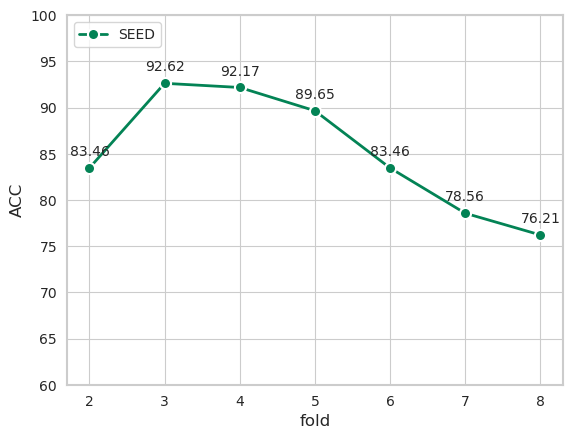

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x = [2, 3, 4, 5, 6, 7, 8]
y1 = [83.46,92.62,92.17,89.65,83.46,78.56,76.21]
color1 = "#038355"  # 孔雀绿

# 设置字体
font = {'family': 'Times New Roman', 'size': 12}
plt.rc('font', **font)

# 绘图
sns.set_style("whitegrid")
sns.lineplot(x=np.arange(len(x)), y=y1, color=color1, linewidth=2.0, marker="o", markersize=8,
             markeredgecolor="white", markeredgewidth=1.5, label='SEED')

# 添加标题和标签
plt.xlabel("fold", fontsize=12)
plt.ylabel("ACC", fontsize=12)

# 添加图例
plt.legend(loc='upper left', frameon=True, fontsize=10)

# 设置刻度字体和范围
plt.xticks(np.arange(len(x)), labels=x, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(60, 100)

# 在每个点上添加坐标值
for i in range(len(x)):
    plt.text(i, y1[i]+1, f'{y1[i]:.2f}',
             ha='center', va='bottom', fontsize=10)

# 设置坐标轴样式
for spine in plt.gca().spines.values():
    spine.set_edgecolor("#CCCCCC")
    spine.set_linewidth(1.5)

# plt.savefig('lineplot2.pdf', dpi=300, bbox_inches='tight')
plt.show()

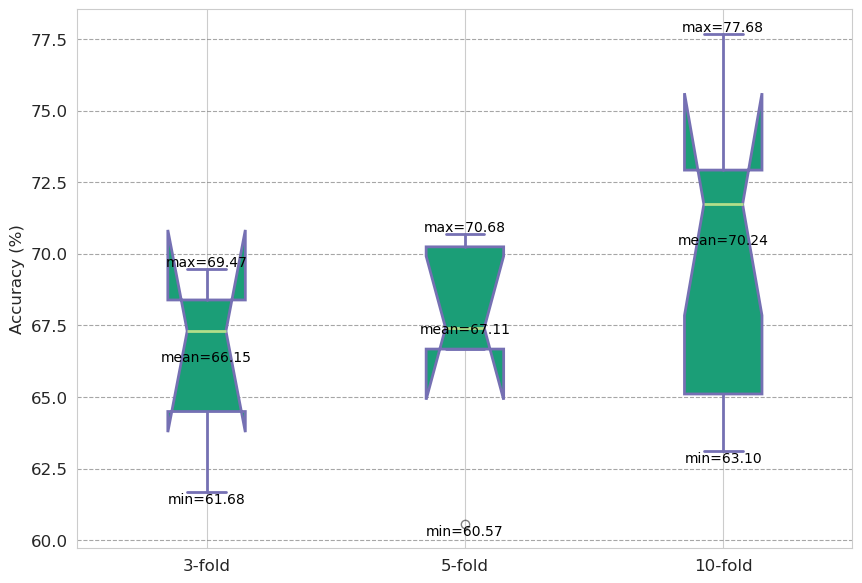

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data from the user's k-fold experiments
accuracies = {
    '3fold': [69.47, 67.30, 61.68],
    '5fold': [70.68, 66.67, 70.24, 67.41, 60.57],
    '10fold': [72.62, 77.68, 65.77, 72.92, 77.08, 70.83, 72.92, 64.88, 63.10, 64.58]
}

# Data preparation for boxplot
data_to_plot = [accuracies['3fold'], accuracies['5fold'], accuracies['10fold']]

# Function to add annotations on the boxplot
def add_annotations(ax, data):
    for i, n in enumerate(data):
        # Median (central line of the box)
        median = np.median(n)
        # Mean (average value)
        mean = np.mean(n)
        # Std (standard deviation)
        std = np.std(n)
        # Max and Min values
        max_val = np.max(n)
        min_val = np.min(n)
        
        ax.annotate(f'mean={mean:.2f}', xy=(i+1, mean),
                    xycoords='data', ha='center', va='bottom', fontsize=10,
                    color='black')
        # Annotate Max
        ax.annotate(f'max={max_val:.2f}', xy=(i+1, max_val),
                    xycoords='data', ha='center', va='bottom', fontsize=10,
                    color='black')
        # Annotate Min
        ax.annotate(f'min={min_val:.2f}', xy=(i+1, min_val),
                    xycoords='data', ha='center', va='top', fontsize=10,
                    color='black')

# Recreate the figure and boxplot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot, patch_artist=True, notch=True, showfliers=True, labels=['3-fold', '5-fold', '10-fold'])

# Set boxplot styles
for box in bp['boxes']:
    box.set(color='#7570b3', linewidth=2)
    box.set(facecolor = '#1b9e77')
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

# Add custom labels
ax.set_xticklabels(['3-fold', '5-fold', '10-fold'])
ax.set_ylabel('Accuracy (%)')
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)
ax.set_axisbelow(True)

# Call function to add annotations
add_annotations(ax, data_to_plot)

# Show the plot with annotations
plt.savefig('boxplot.pdf', dpi=300, bbox_inches='tight')

plt.show()



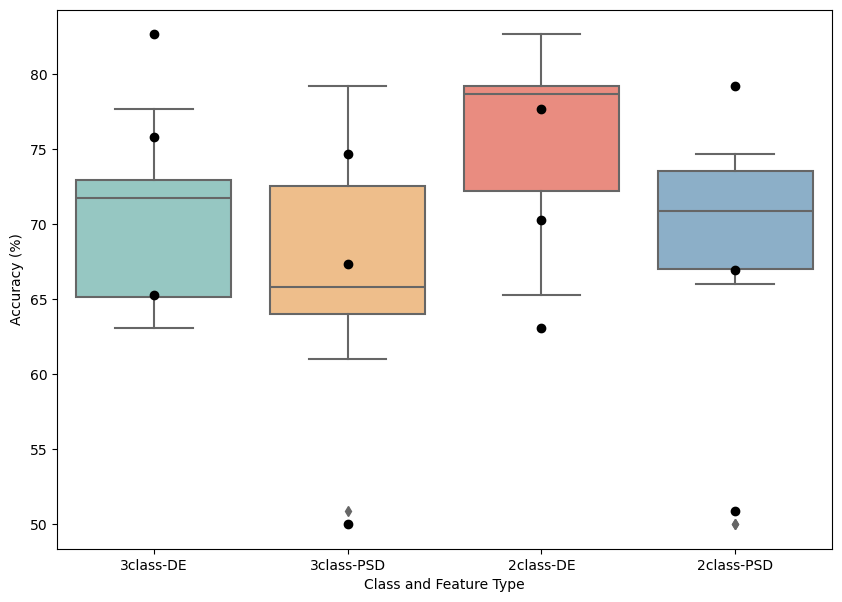

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data provided by the user
data = {
    "fold": list(range(1, 11)) + ['avg'],
    "3class-DE": ["72.61/10", "77.68/6.45", "65.77/8.71", "72.92/8.74", "77.08/10.17",
                  "70.83/7.69", "72.92/7.92", "64.88/4.5", "63.1/6.35", "64.58/4.28", "70.24/05.31"],
    "3class-PSD": ["74.11/7.79", "73.21/6.45", "65.77/5.49", "79.17/7.48", "61.01/5.92",
                   "70.54/6.77", "50.89/2.85", "64.88/10.38", "63.69/6.86", "65.77/6.98", "67.11/04.05"],
    "2class-DE": ["82.64/10.61", "78.82/8.35", "74.31/6.65", "78.47/9.87", "79.17/6.60",
                  "79.17/6.15", "79.51/9.44", "71.53/5.58", "65.28/4.61", "68.75/6.51", "75.76/05.58"],
    "2class-PSD": ["73.26/9.77", "73.96/10.74", "73.61/10.92", "50/10.47", "74.65/10.20",
                   "70.14/9.04", "70.49/8.12", "71.18/9.33", "50/3.25", "65.97/7.03", "67.33/09.47"]
}

# Processing the data to split the accuracy and standard deviation
processed_data = {}
for key, values in data.items():
    if key != "fold":
        processed_data[key] = {
            "accuracy": [],
            "std_dev": []
        }
        for value in values:
            accuracy, std_dev = value.split('/')
            processed_data[key]["accuracy"].append(float(accuracy))
            processed_data[key]["std_dev"].append(float(std_dev))

# Converting the processed data into a DataFrame for visualization
df_data = []
for feature in ["3class-DE", "3class-PSD", "2class-DE", "2class-PSD"]:
    accuracies = processed_data[feature]["accuracy"]
    std_devs = processed_data[feature]["std_dev"]
    for fold, acc, std in zip(data["fold"], accuracies, std_devs):
        df_data.append({"Feature": feature, "Fold": fold, "Accuracy": acc, "Standard Deviation": std})

df = pd.DataFrame(df_data)

# Preparing the data for the boxplot (ignoring the 'avg' for the boxplot)
df_boxplot = df[df['Fold'] != 'avg']

# Custom colors for the boxplots
custom_colors = ["#8ECFC9", "#FFBE7A", "#FA7F6F", "#82B0D2"]

# Plotting the boxplots for accuracy of each feature type with max, min, and average annotations
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='Feature', y='Accuracy', data=df_boxplot, palette=custom_colors)

# Calculate max, min, and mean for each feature
for i, feature in enumerate(sorted(set(df_boxplot['Feature']))):
    feature_data = df_boxplot[df_boxplot['Feature'] == feature]
    max_val = feature_data['Accuracy'].max()
    min_val = feature_data['Accuracy'].min()
    mean_val = feature_data['Accuracy'].mean()

    # Add scatter plot for max, min, and mean
    plt.scatter([i]*3, [max_val, min_val, mean_val], color='black', zorder=5)
    
    # Annotate the mean value
    # plt.text(i, mean_val, f'{mean_val:.2f}', color='black', ha="center", va="bottom")

# Set title and labels
plt.ylabel('Accuracy (%)')
plt.xlabel('Class and Feature Type')

# Show the plot
plt.savefig('boxplot.pdf', dpi=300, bbox_inches='tight')

plt.show()
